# <b><span style='color:#F1A424'>AutoML - Regression - Bike Sharing Demand Prediction </span> </b>

### Disclaimer
The sample code (“Sample Code”) provided is not covered by any Teradata agreements. Please be aware that Teradata has no control over the model responses to such sample code and such response may vary. The use of the model by Teradata is strictly for demonstration purposes and does not constitute any form of certification or endorsement. The sample code is provided “AS IS” and any express or implied warranties, including the implied warranties of merchantability and fitness for a particular purpose, are disclaimed. In no event shall Teradata be liable for any direct, indirect, incidental, special, exemplary, or consequential damages (including, but not limited to, procurement of substitute goods or services; loss of use, data, or profits; or business interruption) sustained by you or a third party, however caused and on any theory of liability, whether in contract, strict liability, or tort arising in any way out of the use of this sample code, even if advised of the possibility of such damage.

## <b> Problem overview:</b>
    

**Bike Sharing Dataset**

**Features**:

- `instant`: record index
- `dteday` : date
- `season` : season (1:springer, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from [Web Link])
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
- `weathersit` :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- `atemp`: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users

**Target Variable**:

- `cnt`: count of total rental bikes including both casual and registered

        
**Objective**:

The primary objective is typically to build a model that can accurately predict the count of total rental bikes including both casual and registered.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','bike_sharing')

In [5]:
# Fetching in teradata dataframe
bike_df = DataFrame("bike_sharing")

In [6]:
# first 5 rows
bike_df.head()

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,82,1518,1600
6,06-01-2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606
7,07-01-2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
9,09-01-2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.36195,54,768,822
10,10-01-2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321
8,08-01-2011,1,0,1,0,6,0,2,0.165,0.162254,0.535833,0.266804,68,891,959
4,04-01-2011,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562
2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [7]:
# bike_df dataset
bike_df.shape

(731, 16)

In [8]:
bike_df.info()

<class 'teradataml.dataframe.dataframe.DataFrame'>
Data columns (total 16 columns):
instant                 int
dteday        datetime.date
season                  int
yr                      int
mnth                    int
holiday                 int
weekday                 int
workingday              int
weathersit              int
temp                  float
atemp                 float
hum                   float
windspeed             float
casual                  int
registered              int
cnt                     int
dtypes: float(4), int(11), datetime.date(1)


In [9]:
# Performing sampling to get 80% for trainning and 20% for testing
bike_df_sample = bike_df.sample(frac = [0.8, 0.2])

In [10]:
bike_df_sample.head()

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,sampleid
3,11/01/03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1
5,11/01/05,1,0,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,82,1518,1600,1
6,11/01/06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606,1
7,11/01/07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510,1
9,11/01/09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.36195,54,768,822,1
10,11/01/10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321,1
8,11/01/08,1,0,1,0,6,0,2,0.165,0.162254,0.535833,0.266804,68,891,959,1
4,11/01/04,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562,1
2,11/01/02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1
1,11/01/01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1


In [11]:
# Fetching train and test data
bike_df_train= bike_df_sample[bike_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
bike_df_test = bike_df_sample[bike_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [12]:
# train data shape
bike_df_train.shape

(585, 16)

In [13]:
# test data shape
bike_df_test.shape

(146, 16)

In [14]:
#train dataset
bike_df_train.head()

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
3,11/01/03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
5,11/01/05,1,0,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,82,1518,1600
6,11/01/06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606
7,11/01/07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
9,11/01/09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.36195,54,768,822
10,11/01/10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321
8,11/01/08,1,0,1,0,6,0,2,0.165,0.162254,0.535833,0.266804,68,891,959
4,11/01/04,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562
2,11/01/02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
1,11/01/01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [15]:
# test dataset
bike_df_test.head()

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
20,11/01/20,1,0,1,0,4,1,2,0.261667,0.25505,0.538333,0.195904,83,1844,1927
42,11/02/11,1,0,2,0,5,1,1,0.189091,0.213509,0.506364,0.10855,149,1597,1746
49,11/02/18,1,0,2,0,5,1,1,0.521667,0.511983,0.516667,0.264925,579,2348,2927
52,11/02/21,1,0,2,1,1,0,2,0.303333,0.284075,0.605,0.307846,195,912,1107
66,11/03/07,1,0,3,0,1,1,1,0.261739,0.238461,0.551304,0.341352,244,1628,1872
81,11/03/22,2,0,3,0,2,1,1,0.441667,0.440642,0.624583,0.22575,460,2243,2703
64,11/03/05,1,0,3,0,6,0,2,0.384167,0.378779,0.789167,0.251871,640,1437,2077
26,11/01/26,1,0,1,0,3,1,3,0.2175,0.2036,0.8625,0.29385,34,472,506
18,11/01/18,1,0,1,0,2,1,2,0.216667,0.232333,0.861667,0.146775,9,674,683
13,11/01/13,1,0,1,0,4,1,1,0.165,0.150883,0.470417,0.301,38,1368,1406


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [16]:
# Creating AutoML instance
# Using all models from model training.
# Keeping early stopping criteria max_models as 8
# and verbose level 2 for detailed loggging

aml = AutoML(max_models=8, 
             verbose=2)


Task type is set to Regression as target column is having distinct values greater than 20.


Feature Exploration started ...

Data Overview:
Total Rows in the data: 585
Total Columns in the data: 16
Identified Date Columns:


['dteday']


Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
dteday,DATE,585,0,None,None,None,None,0.0,100.0
holiday,BIGINT,585,0,None,567,18,0,0.0,100.0
weathersit,BIGINT,585,0,None,0,585,0,0.0,100.0
temp,FLOAT,585,0,None,0,585,0,0.0,100.0
casual,BIGINT,585,0,None,0,585,0,0.0,100.0
yr,BIGINT,585,0,None,294,291,0,0.0,100.0
registered,BIGINT,585,0,None,0,585,0,0.0,100.0
instant,BIGINT,585,0,None,0,585,0,0.0,100.0
atemp,FLOAT,585,0,None,0,585,0,0.0,100.0
cnt,BIGINT,585,0,None,0,585,0,0.0,100.0


       instant   season       yr     mnth  holiday  weekday  workingday  weathersit     temp    atemp      hum  windspeed    casual  registered       cnt
func                                                                                                                                                     
std    214.157    1.114    0.500    3.451    0.173    1.982       0.463       0.546    0.184    0.163    0.142      0.079   693.846    1572.070  1953.878
25%    181.000    2.000    0.000    4.000    0.000    1.000       0.000       1.000    0.334    0.334    0.522      0.133   316.000    2507.000  3190.000
50%    364.000    3.000    0.000    7.000    0.000    3.000       1.000       1.000    0.492    0.479    0.627      0.181   710.000    3702.000  4590.000
75%    556.000    3.000    1.000   10.000    0.000    5.000       1.000       2.000    0.659    0.611    0.729      0.233  1071.000    4801.000  5992.000
max    731.000    4.000    1.000   12.000    1.000    6.000       1.000     

func,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
std,214.157,1.114,0.5,3.451,0.173,1.982,0.463,0.546,0.184,0.163,0.142,0.079,693.846,1572.07,1953.878
25%,181,2,0,4,0,1,0,1,0.334,0.334,0.522,0.133,316,2507,3190
50%,364,3,0,7,0,3,1,1,0.492,0.479,0.627,0.181,710,3702,4590
75%,556,3,1,10,0,5,1,2,0.659,0.611,0.729,0.233,1071,4801,5992
max,731,4,1,12,1,6,1,3,0.862,0.841,0.97,0.507,3410,6946,8714
min,1,1,0,1,0,0,0,1,0.059,0.079,0,0.022,2,20,22
mean,366.347,2.513,0.497,6.578,0.031,3.039,0.691,1.398,0.495,0.474,0.626,0.19,842.55,3679.783,4522.333
count,585,585,585,585,585,585,585,585,585,585,585,585,585,585,585



Target Column Distribution:


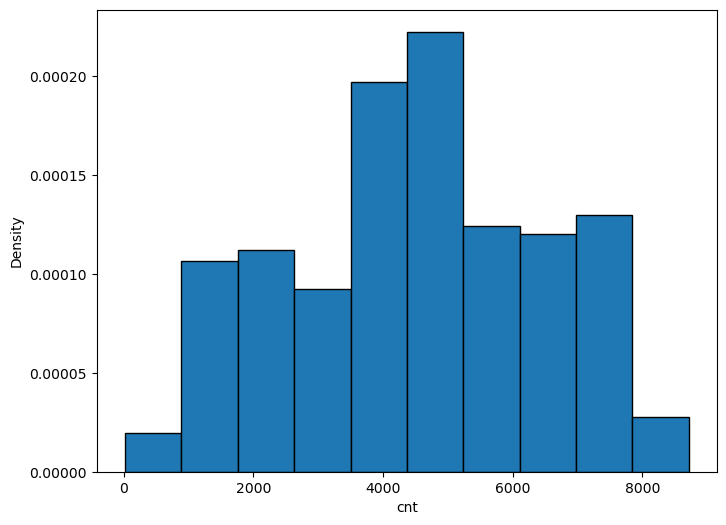

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0        hum           0.341880
1     casual           7.692308
2    holiday           3.076923
3  windspeed           1.880342


Analysis completed. No action taken.                                                    


['dteday']


['dteday']
No useful date feature found                                                             


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


Analysis completed. No categorical columns were found.                                   


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0        hum           0.341880
1    holiday           3.076923
2     casual           7.692308
3  windspeed           1.880342


['holiday', 'casual', 'windspeed', 'hum']


instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,id
242,3,0,8,0,2,1,1,0.639167,0.594704,0.548333,0.125008,775,4429,5204,28
507,2,1,5,0,1,1,2,0.598333,0.565667,0.81125,0.233204,630,3729,4359,44
425,1,1,2,0,3,1,2,0.344348,0.34847,0.804783,0.179117,65,1769,1834,52
118,2,0,4,0,4,1,2,0.6175,0.578929,0.700833,0.320908,569,3489,4058,60
362,1,0,12,0,3,1,1,0.29913,0.279974,0.503913,0.293961,255,2047,2302,84
259,3,0,9,0,5,1,2,0.469167,0.461475,0.590417,0.164183,742,4018,4760,92
587,3,1,8,0,4,1,1,0.755833,0.699508,0.620417,0.1561,1196,6090,7286,68
38,1,0,2,0,1,1,1,0.271667,0.303658,0.738333,0.0454083,120,1592,1712,36
345,4,0,12,0,0,0,1,0.220833,0.253154,0.49,0.0665417,377,2366,2743,20
80,2,0,3,0,1,1,2,0.430435,0.409735,0.737391,0.288783,401,1676,2077,12


['casual', 'registered', 'instant']


['casual', 'registered', 'instant']


cnt,id,casual,registered,instant
1977,11,-1.0391196730040158,-1.1999303120498335,0.139145197882178
1607,13,-1.3021424120115361,-1.3526818668297826,-0.14387532063111363
2134,14,-0.9666330913877701,-1.1232402310492005,-1.3733906879429543
6966,15,0.9055917595004055,1.3459289342826557,0.9882067534220529
7421,17,0.9842914766837579,1.6080581455717047,0.8026195281674354
2743,20,-0.6642604937885737,-0.8321950875795849,-0.055721388635170344
5260,16,0.14137608474627184,0.5054810793822759,0.7051862349087612
2077,12,-0.6145554092517194,-1.265934070288083,-1.285236755947011
1605,10,-1.3352791350361055,-1.3438813657313495,-1.4708239812016286
4795,9,-0.2956144501402382,0.34581484516784333,-0.42689583914440526


['casual', 'registered']


['r_casual', 'r_registered']


id,cnt,r_casual,r_registered
11,1977,-1.0391196730040158,-1.1999303120498335
13,1607,-1.3021424120115361,-1.3526818668297826
14,2134,-0.9666330913877701,-1.1232402310492005
15,6966,0.9055917595004055,1.3459289342826557
17,7421,0.9842914766837579,1.6080581455717047
20,2743,-0.6642604937885737,-0.8321950875795849
16,5260,0.14137608474627184,0.5054810793822759
12,2077,-0.6145554092517194,-1.265934070288083
10,1605,-1.3352791350361055,-1.3438813657313495
9,4795,-0.2956144501402382,0.34581484516784333


['instant', 'season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']


cnt,holiday,id,instant,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
1605,0,10,-1.470823981201629,-1.3501353848375495,-0.9412913532826627,-1.3126405802267411,-0.009348108095416379,0.5465658031885915,1.0585715534396725,-1.900579241190248,-1.9615476804922305,-0.97912089456132,0.03213503763314097,-1.335279135036105,-1.3438813657313493
1977,0,11,0.13914519788217805,-1.3501353848375495,1.062370324036864,-1.5979730453353507,-1.6078745924116122,-1.8296058666058783,1.0585715534396725,-1.7513686815207257,-1.8525384993814162,1.1726583899721112,0.17923569173480167,-1.0391196730040155,-1.1999303120498332
1650,0,27,-1.5682572744603034,-1.3501353848375495,-0.9412913532826627,-1.5979730453353507,-0.009348108095416379,0.5465658031885915,1.0585715534396725,-1.053286994664802,-1.0263572665533538,0.783575536528113,0.29745835836581486,-1.2835030053102152,-1.331309221305016
6966,0,15,0.9882067534220533,0.4212698643227139,1.062370324036864,0.11402174531630585,-1.0750324309728803,0.5465658031885915,-0.7515858029421676,1.3664951642099892,1.3495235303013962,0.4440211437626544,-0.651074556507325,0.9055917595004052,1.3459289342826555
1607,0,13,-0.1438753206311137,1.3069724889028456,-0.9412913532826627,1.2553516057507434,-0.5421902695341483,0.5465658031885915,2.8687289098215127,-0.3830964904638479,-0.27843063482549096,2.3593000656901264,-0.922023636119894,-1.3021424120115357,-1.3526818668297826
3163,0,21,0.12986583661944717,-1.3501353848375495,1.062370324036864,-1.5979730453353507,1.0563362147820474,0.5465658031885915,1.0585715534396725,-1.4552839399605375,-1.4963459795031016,-1.2987682579518753,0.2216263978709595,-1.2068743333158984,-0.4034849626416201
4795,0,9,-0.42689583914440543,0.4212698643227139,-0.9412913532826627,0.6846866755335247,0.5234940533433156,0.5465658031885915,1.0585715534396725,0.7563775623921289,0.5301254145480759,1.9280619897691917,-0.7948923827880302,-0.29561445014023807,0.3458148451678433
7421,0,17,0.8026195281674358,-0.4644327602574178,1.062370324036864,-0.17131071979230356,-0.009348108095416379,0.5465658031885915,-0.7515858029421676,0.9044199331722228,0.8708223342395472,-0.3560001830414236,2.135869181485393,0.9842914766837576,1.6080581455717045
5260,0,16,0.7051862349087615,-0.4644327602574178,1.062370324036864,-0.456643184900913,-0.009348108095416379,0.5465658031885915,1.0585715534396725,0.7204920917150339,0.7100114951822684,1.0180059677899624,-1.150759091594946,0.14137608474627178,0.5054810793822759
2999,0,24,0.03243254336077296,-1.3501353848375495,-0.9412913532826627,1.540684070859353,1.0563362147820474,0.5465658031885915,-0.7515858029421676,-0.9483491788969338,-0.9026472869880676,0.03360372208574692,-0.7102744308221519,-0.42816134223851593,-0.7429328621526186


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7']


response_column : cnt                                                                                                                                 
name : decision_forest
tree_type : Regression
min_impurity : (0.0, 0.2, 0.3)
max_depth : (5, 4, 6, 7)
min_node_size : (1, 3, 4)
num_trees : (-1, 30, 40)
seed : 42
Total number of models for decision_forest : 108
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : cnt
name : xgboost
model_type : Regression
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.2, 0.3)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.01, 0.1, 0.2)
max_depth : (5, 4, 6, 7)
min_node_size : (1, 3, 4)
iter_num : (10, 30, 40)
seed : 42
Total number of models for xgboost : 3456
-----------------------------------------------------------------------------------------------------------------------

,RANK,MODEL_ID,FEATURE_SELECTION,MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD,ADJUSTED_R2
0,1,GLM_1,rfe,0.424202,2.653069e-01,9.833913e-08,0.016126,-0.008941,0.515079,0.000314,1.060263,1.000000,1.000000,0.000110,9.858096e-08,1.000000
1,2,KNN_1,rfe,63.019468,8.668818e+03,4.502509e-04,1.531550,0.081472,93.106489,0.021219,428.711653,0.997747,0.997844,1.737173,4.507162e-04,0.997738
2,3,DECISIONFOREST_0,lasso,282.892897,1.380505e+05,4.854032e-02,8.236190,0.993536,371.551432,0.220319,1055.596774,0.964113,0.964343,54.312940,8.506177e-02,0.963902
3,4,DECISIONFOREST_2,pca,529.427848,5.318989e+05,1.431576e-01,17.922541,-6.248622,729.314012,0.378362,2756.888889,0.861731,0.864110,160.719218,3.632554e-01,0.859537
4,5,XGBOOST_2,pca,735.305782,7.753352e+05,6.083180e-02,19.216930,9.778043,880.531184,0.246641,2549.408013,0.798450,0.900685,181.728396,6.015135e-02,0.795250
5,6,XGBOOST_1,rfe,906.099625,1.171885e+06,5.261207e-02,19.090117,18.971700,1082.536385,0.229373,2876.242912,0.695365,0.908545,243.069568,5.783523e-02,0.694171
6,7,DECISIONFOREST_1,rfe,852.730029,1.257471e+06,1.747342e-01,37.324755,-24.743560,1121.370358,0.418012,2700.208282,0.673117,0.673117,361.760782,1.313313e-01,0.671835
7,8,XGBOOST_0,lasso,963.859454,1.480416e+06,1.235468e-01,30.166077,-11.618318,1216.723605,0.351492,3208.507938,0.615162,0.620211,362.680921,1.114672e-01,0.612894


In [17]:
# Fitting train data
aml.fit(bike_df_train, bike_df_train.cnt)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [18]:
# Fetching Leaderboard
aml.leaderboard()

,RANK,MODEL_ID,FEATURE_SELECTION,MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD,ADJUSTED_R2
0,1,GLM_1,rfe,0.424202,2.653069e-01,9.833913e-08,0.016126,-0.008941,0.515079,0.000314,1.060263,1.000000,1.000000,0.000110,9.858096e-08,1.000000
1,2,KNN_1,rfe,63.019468,8.668818e+03,4.502509e-04,1.531550,0.081472,93.106489,0.021219,428.711653,0.997747,0.997844,1.737173,4.507162e-04,0.997738
2,3,DECISIONFOREST_0,lasso,282.892897,1.380505e+05,4.854032e-02,8.236190,0.993536,371.551432,0.220319,1055.596774,0.964113,0.964343,54.312940,8.506177e-02,0.963902
3,4,DECISIONFOREST_2,pca,529.427848,5.318989e+05,1.431576e-01,17.922541,-6.248622,729.314012,0.378362,2756.888889,0.861731,0.864110,160.719218,3.632554e-01,0.859537
4,5,XGBOOST_2,pca,735.305782,7.753352e+05,6.083180e-02,19.216930,9.778043,880.531184,0.246641,2549.408013,0.798450,0.900685,181.728396,6.015135e-02,0.795250
5,6,XGBOOST_1,rfe,906.099625,1.171885e+06,5.261207e-02,19.090117,18.971700,1082.536385,0.229373,2876.242912,0.695365,0.908545,243.069568,5.783523e-02,0.694171
6,7,DECISIONFOREST_1,rfe,852.730029,1.257471e+06,1.747342e-01,37.324755,-24.743560,1121.370358,0.418012,2700.208282,0.673117,0.673117,361.760782,1.313313e-01,0.671835
7,8,XGBOOST_0,lasso,963.859454,1.480416e+06,1.235468e-01,30.166077,-11.618318,1216.723605,0.351492,3208.507938,0.615162,0.620211,362.680921,1.114672e-01,0.612894


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [19]:
# Fetching best performing model for dataset
aml.leader()

,RANK,MODEL_ID,FEATURE_SELECTION,MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD,ADJUSTED_R2
0,1,GLM_1,rfe,0.424202,0.265307,9.833913e-08,0.016126,-0.008941,0.515079,0.000314,1.060263,1.0,1.0,0.00011,9.858096e-08,1.0


## <b><span style='color:#F1A424'>| 5.</span> Get Hyperparameter for Trained Model : </b>

In [20]:
aml.model_hyperparameters(rank=1)

{'response_column': 'cnt',
 'name': 'glm',
 'family': 'GAUSSIAN',
 'lambda1': 0.001,
 'alpha': 0.15,
 'learning_rate': 'constant',
 'initial_eta': 0.1,
 'momentum': 0.65,
 'iter_num_no_change': 50,
 'iter_max': 400,
 'batch_size': 100,
 'persist': False,
 'max_models': 1}

In [21]:
aml.model_hyperparameters(rank=4)

{'response_column': 'cnt',
 'name': 'decision_forest',
 'tree_type': 'Regression',
 'min_impurity': 0.0,
 'max_depth': 5,
 'min_node_size': 3,
 'num_trees': -1,
 'seed': 42,
 'persist': False,
 'max_models': 1}

## <b><span style='color:#F1A424'>| 6.</span> Generate Prediction and Performance Metrics : </b>

In [22]:
# Generating prediction on test data
prediction = aml.predict(bike_df_test)

Data Transformation started ...


id,casual,registered,instant,cnt
79,190,2743,314,2933
113,1208,4728,458,5936
72,2001,2757,148,4758
21,1122,5108,446,6230
24,2708,4790,526,7498
131,1524,2778,212,4302
102,874,4604,647,5478
147,1208,3341,597,4549
62,95,2273,369,2368
44,810,2261,331,3071


cnt,id,casual,registered,instant
3249,48,1.9742510770427713,-1.314965433550783,-1.2249209077392604
3071,44,0.2325020730638379,-0.8981988458178347,-0.12067691747428647
2368,62,-1.2482952370966107,-0.8906555591620348,0.05563094651760013
7693,33,0.201436395228304,2.016652839427536,1.4196970521390384
4105,55,-0.011881259242362009,-0.1740433268610378,-1.0393336824846429
3372,75,0.694345150218775,-0.8491674825551349,0.42680539702683506
1406,17,-1.3663448128716396,-1.4595450944536157,-1.5960953582484954
5532,27,-0.5648503247148652,0.890817306049391,1.6516810837073104
4191,28,2.096442743195871,-0.7599052571281686,-1.127487614480586
6889,121,2.728111525851727,0.7443518234826083,1.308344716986268


id,casual,registered,cnt
56,1118,6407,7525
106,195,912,1107
89,460,2243,2703
40,317,2415,2732
77,599,2826,3425
115,841,3617,4458
11,847,3554,4401
98,1829,4224,6053
22,783,4332,5115
67,606,3784,4390


id,cnt,r_casual,r_registered
67,4390,-0.18999114549942295,0.05916995224744455
17,1406,-1.3663448128716396,-1.4595450944536157
27,5532,-0.5648503247148652,0.890817306049391
33,7693,0.201436395228304,2.016652839427536
44,3071,0.2325020730638379,-0.8981988458178347
62,2368,-1.2482952370966107,-0.8906555591620348
78,7592,0.9159469854455834,1.736294018720304
70,7363,0.9987887930070071,1.5671986761861214
48,3249,1.9742510770427713,-1.314965433550783
35,1796,-0.6911840812460364,-1.419314232289349


cnt,holiday,id,instant,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
4191,0,28,-1.1274876144805865,-0.4644327602574178,-0.9412913532826627,-0.7419756500095224,-1.6078745924116122,-1.8296058666058783,1.0585715534396725,0.5053353850616517,0.5109348963840247,1.2765118418920935,0.07791754512787955,2.0964427431958703,-0.7599052571281685
1406,0,17,-1.596095358248496,-1.3501353848375495,-0.9412913532826627,-1.5979730453353507,0.5234940533433156,0.5465658031885915,-0.7515858029421676,-1.7379102841770806,-1.9214010922242806,-1.153159294435199,1.5599576568290254,-1.366344812871639,-1.4595450944536155
5532,0,27,1.651681083707311,1.3069724889028456,1.062370324036864,1.540684070859353,0.5234940533433156,0.5465658031885915,-0.7515858029421676,-1.0337669351575793,-1.05197293765314,-1.0432388023686878,-0.1686350837488737,-0.564850324714865,0.8908173060493909
4390,0,67,-0.68671795450087,0.4212698643227139,-0.9412913532826627,0.11402174531630585,0.5234940533433156,0.5465658031885915,-0.7515858029421676,1.568548775209599,1.6521731090485854,-0.34731360909045306,-0.10869963805507754,-0.1899911454994229,0.05916995224744454
7592,0,78,0.9928464340534188,0.4212698643227139,1.062370324036864,0.11402174531630585,-0.5421902695341483,0.5465658031885915,-0.7515858029421676,1.415661381385793,1.449529003237866,0.16445907150492542,0.3408162046483951,0.9159469854455831,1.7362940187203038
7363,0,70,0.8072592087988012,-0.4644327602574178,1.062370324036864,-0.17131071979230356,0.5234940533433156,0.5465658031885915,-0.7515858029421676,0.8638670902963519,0.9514128030264866,-0.4451000208639079,0.9156516156207146,0.9987887930070067,1.5671986761861212
4105,0,55,-1.0393336824846433,-0.4644327602574178,-0.9412913532826627,-0.456643184900913,1.0563362147820474,0.5465658031885915,1.0585715534396725,0.13280694658956058,0.16207154057215786,1.651240792118835,-0.0923536074113148,-0.011881259242362004,-0.17404332686103777
3372,0,75,0.42680539702683523,-0.4644327602574178,1.062370324036864,-1.0273081151181318,1.5891783762207794,-1.8296058666058783,1.0585715534396725,0.07897335721498092,0.11596090571702412,1.8089838359285684,0.08609056044976071,0.6943451502187747,-0.8491674825551347
7693,0,33,1.419697052139039,1.3069724889028456,1.062370324036864,0.9700191406421341,-0.009348108095416379,0.5465658031885915,-0.7515858029421676,0.536558866898908,0.5527984990814488,0.030270418852301462,-1.5485125039265035,0.20143639522830395,2.016652839427536
1951,1,76,0.04635158525486928,-1.3501353848375495,1.062370324036864,-1.5979730453353507,-1.0750324309728803,-1.8296058666058783,-0.7515858029421676,-1.1565075189316207,-1.3061881482360485,-1.7891278556771548,1.9509002230590153,-0.939709503930307,-1.2464472464272665


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,cnt
0,48,1.549541,-2.060313,-0.896741,2.120916,0.911481,1.659889,-0.143206,0.626630,3249
1,78,-2.967555,-0.930678,0.316360,-0.999358,0.301397,0.515577,0.300726,-0.503007,7592
2,28,0.449699,-0.434053,-2.565962,0.697933,2.462018,1.483616,-0.102398,0.330057,4191
3,67,-0.940903,-1.097118,-1.729816,-0.699271,-1.204323,-0.330034,0.303547,-0.137761,4390
4,17,4.382121,-1.016717,0.974362,-0.389911,-1.009721,-0.370278,0.778019,-0.237619,1406
5,44,-0.057484,0.499234,-1.097921,2.399737,-0.084773,1.871280,0.753292,-0.717229,3071
6,33,-3.180386,0.343570,1.029732,0.216507,-0.843768,-0.083777,-1.168080,-0.136876,7693
7,55,0.811275,0.849932,-1.702447,-1.096986,0.326659,-1.182149,-0.331628,-0.285415,4105
8,35,1.391914,0.174048,2.687548,1.903804,1.073514,1.882209,2.053741,-0.939634,1796
9,70,-1.942140,-1.514083,0.908494,-1.032062,0.447139,-0.563208,0.687820,-0.388774,7363


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being picked for evaluation:
Model ID : GLM_1 
Feature Selection Method : rfe

Prediction : 
   id   prediction   cnt
0  17  1406.638968  1406
1  44  3071.485388  3071
2  62  2368.351557  2368
3  28  4191.576492  4191
4  55  4105.084918  4105
5  75  3372.500233  3372
6  33  7691.956983  7693
7  76  1951.564850  1951
8  67  4389.947228  4390
9  22  5114.799076  5115


In [23]:
# Printing prediction
prediction.head()

id,prediction,cnt
10,3376.0270507433133,3376
12,4334.378791912346,4334
13,4067.9530807805827,4068
14,7108.893190111565,7109
16,2294.6777149216177,2294
17,1406.6389681888404,1406
15,4791.920160545047,4792
11,4401.0666823172405,4401
9,4906.328473711045,4906
8,6397.6164476644035,6398


In [24]:
# Fetching performance metrics on test data
performance_metrics = aml.evaluate(bike_df_test)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : GLM_1 
Feature Selection Method : rfe

Performance Metrics : 
        MAE       MSE          MSLE      MAPE       MPE      RMSE     RMSLE        ME   R2   EV       MPD           MGD
0  0.390525  0.218552  8.143716e-08  0.014589 -0.009538  0.467495  0.000285  1.043017  1.0  1.0  0.000094  8.162014e-08


In [25]:
performance_metrics

MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD
0.3905249212093918,0.218552018317463,8.143715695232421e-08,0.014589396042942297,-0.009537511867249918,0.4674954741144164,0.0002853719624495795,1.043017094130846,0.9999999373217967,0.9999999386675118,9.376015750043335e-05,8.162013808809032e-08


In [26]:
# Generating prediction on test data
prediction = aml.predict(bike_df_test, 3)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : DECISIONFOREST_0 
Feature Selection Method : lasso

Prediction : 
    id   prediction  confidence_lower  confidence_upper   cnt
0   78  7474.906250       7474.906250       7474.906250  7592
1   55  4564.594203       4564.594203       4564.594203  4105
2   75  3946.000000       3946.000000       3946.000000  3372
3   44  3424.636364       3424.636364       3424.636364  3071
4   33  7474.906250       7474.906250       7474.906250  7693
5   76  2068.838710       2068.838710       2068.838710  1951
6   67  3841.725806       3841.725806       3841.725806  4390
7   22  5185.403226       5185.403226       5185.403226  5115
8   28  3946.000000       3946.000000       3946.000000  4191
9  121  6558.000000       6558.000000       6558.000000  6889


In [27]:
# Printing prediction
prediction.head()

id,prediction,confidence_lower,confidence_upper,cnt
10,3841.7258064516127,3841.7258064516127,3841.7258064516127,3376
12,3946.0,3946.0,3946.0,4334
13,3841.7258064516127,3841.7258064516127,3841.7258064516127,4068
14,6558.0,6558.0,6558.0,7109
16,2068.8387096774195,2068.8387096774195,2068.8387096774195,2294
17,1520.5416666666667,1520.5416666666667,1520.5416666666667,1406
15,4564.594202898551,4564.594202898551,4564.594202898551,4792
11,4564.594202898551,4564.594202898551,4564.594202898551,4401
9,4564.594202898551,4564.594202898551,4564.594202898551,4906
8,5185.403225806452,5185.403225806452,5185.403225806452,6398


In [28]:
# Fetching performance metrics on test data
performance_metrics = aml.evaluate(bike_df_test, 3)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : DECISIONFOREST_0 
Feature Selection Method : lasso

Performance Metrics : 
          MAE            MSE      MSLE       MAPE       MPE        RMSE     RMSLE           ME        R2        EV        MPD       MGD
0  353.528167  221518.902292  0.031226  10.380074  0.008998  470.657946  0.176707  1691.277778  0.936471  0.939345  60.128183  0.037845


In [29]:
performance_metrics

MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD
353.5281673667799,221518.90229241224,0.031225528907547442,10.38007352563336,0.0089979685888608,470.6579461694153,0.17670746703958903,1691.2777777777774,0.9364709285200594,0.9393445528689115,60.12818347063235,0.03784507427402046


In [32]:
remove_context()

True